In [1]:
# %load init.ipy
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()
from Chempy.score_function import preload_params_mcmc
preload = preload_params_mcmc()


Populating the interactive namespace from numpy and matplotlib


In [2]:
dat = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_Nomoto2013_net.npz')
mean=dat['mean']
sigma=dat['sigma']
elements=dat['elements']
likelihood=dat['likelihood']
dat.close()

dat2 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_chieffi04_net.npz')
mean2=dat2['mean']
sigma2=dat2['sigma']
elements2=dat2['elements']
likelihood2=dat2['likelihood']
dat2.close()

# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in elements:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

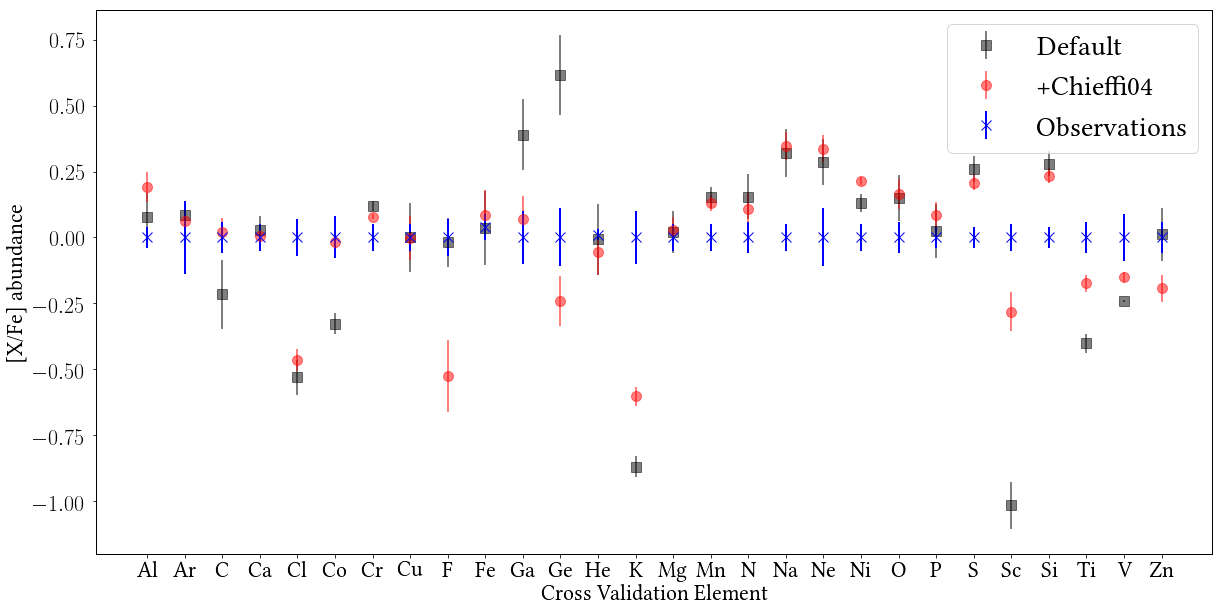

In [4]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials

plt.errorbar(np.arange(len(elements)),mean[9],yerr=sigma[9],fmt='s',ms=marker_size,c='k',alpha=0.5,label='Default')
plt.errorbar(np.arange(len(elements)),mean2[9],yerr=sigma2[9],fmt='o',ms=marker_size,c='r',alpha=0.5,label='+Chieffi04')

plt.errorbar(np.arange(len(elements)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='b',label='Observations')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
plt.legend()
ax=plt.gca()
la=plt.setp(ax,xticks=np.arange(len(elements)), xticklabels=elements)
plt.savefig('PaperPlots/element_prediction.pdf',dpi=300)

In [65]:
score = np.zeros(len(likelihood))
for i in range(len(likelihood)):
    score[i]=np.product(likelihood[i])
score2 = np.zeros(len(likelihood2))
for i in range(len(likelihood2)):
    score2[i]=np.product(likelihood2[i])

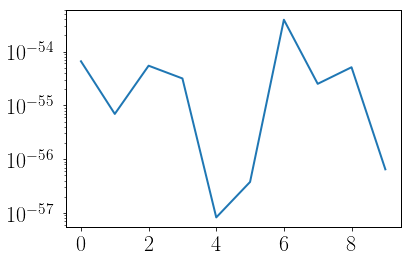

In [69]:
plt.semilogy(np.arange(len(score)),score)
#plt.semilogy(np.arange(len(score2)),score2)

In [112]:
j = 23
i=9
m=mean[i][j]
print(m)
s=sigma[i][j]
print(s)
p=ps_abun[i]
pe = ps_err[i]
l=(2.*np.pi*(pe*pe+s*s))**(-0.5)*np.exp(-(p-m)**2/(2*(s**2+pe**2)))
print(l)

-1.01768038778
0.090167848039
5.44319954008e-23


In [101]:
for j in range(28):
    print(j)
    for i in range(10):
        print(likelihood[i][j])

0
3.06116205813
2.98842517532
3.01700822241
3.11053952542
2.80300877427
2.88420122473
2.96294351059
2.92742335116
3.19417968827
2.96817374627
1
2.4010145338
2.36074819263
2.26375466225
2.21959974336
2.26516424629
2.3200927228
2.28094335017
2.21454758982
2.22534445591
2.30070735174
2
1.2085113128
1.01032679386
0.998408615843
1.14630421651
1.06675410339
0.957087235779
0.942790458164
1.16436442304
1.0559522847
0.88649348593
3
4.95103157095
5.26660745779
5.16115679458
5.25535757948
4.52819537441
5.05098978013
5.45997365566
5.19435147586
5.10032151563
5.12123032698
4
4.18211567127e-06
3.66028413903e-06
3.47425813519e-06
1.46831082697e-06
2.08511001228e-06
4.55690186675e-06
8.17220868744e-06
1.74908370674e-05
3.83319698062e-06
1.20725759918e-06
5
0.00589705385248
0.00348482910363
0.00731243180064
0.00530307085339
0.00703335104365
0.00502566699528
0.00557666346226
0.00585603941744
0.0100943215711
0.00557885745388
6
0.613176443249
0.609230683846
0.633926051213
0.551581650513
0.616860833576
0.6

In [102]:
elements[23]

'Sc'